# ***Introduction:***


---


## This is a data set which contains all the sales data of a supermarket over three months, starting from january 2019 to march 2019 , which has three branches. In this project we will analyse this data and extract valuable information to answer some important questions.




### ***Variable information:***




---


### 1.  **Invoice id:** Computer generated sales slip invoice identification number.


### 2.   **Branch:** Branch of supercenter (3 branches are available identified by A, B and C).


### 3.   **City:** Location of supercenters


### 4. **Customer type:** Type of customers, recorded by Members for customers using member card and Normal for without member card.


### 5. **Gender:** Gender type of customer


### 6. **Product line:** General item categorisation groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel


### 7. **Unit price:** Price of each product in $


### 8. **Quantity:** Number of products purchased by the customer


### 9. **Tax:** 5% tax fee for customer buying


### 10. **Total:** Total price including tax


### 11. **Date:** Date of purchase (Record available from January 2019 to March 2019)


### 12. **Time:** Purchase time (10 am to 9 pm)


### 13. **Payment:** Payment used by the customer for the purchase (3 methods are available – Cash, Credit card and Ewallet)


### 14. **COGS:** Cost of goods sold


### 15. **Gross margin percentage:** Gross margin percentage


### 16. **Gross income:** Gross income


### 17. **Rating:** Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)





# **Understanding of data set:**

---

### Most of the variable or attributes of the data set is self explanatory but before going ahead and analyse it we must understand some important attributes of this data set such as,

### **Gross margin percentage** - A company's gross profit margin percentage is calculated by first subtracting the cost of goods sold (COGS) from the net sales (gross revenues minus returns, allowances, and discounts). This figure is then divided by net sales, to calculate the gross profit margin in percentage terms.

### **Gross income** - Gross income represents the total income from all sources, including returns, discounts, and allowances, before deducting any expenses or taxes.



# **Importing important libraries:**

In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **Importing & reading file :**

In [78]:
from google.colab import files
uploaded = files.upload()

Saving Python_mandatory_project_supermarket_sales.xlsx to Python_mandatory_project_supermarket_sales (2).xlsx


In [79]:
Sup_sales = pd.read_excel("Python_mandatory_project_supermarket_sales.xlsx")

### **Data correction:**

In [106]:
Sup_sales.info()
# finding information of data and data types
Sup_sales.isnull().sum()
# finding the number of null entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   city code                1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product code             1000 non-null   object        
 6   Unit price               996 non-null    float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   datetime64[ns]
 12  Payment                  1000 non-n

Invoice ID                 0
Branch                     0
city code                  0
Customer type              0
Gender                     0
Product code               0
Unit price                 4
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     7
dtype: int64

**So all data types are appropirate except Unit price must be float and Time must be datetime .** **Also there is 4 and 7 null values in Unit price and Rating respectively.**

In [81]:
Sup_sales['Unit price'].replace(['-','$','o'], [0,0,0], inplace = True) 
#using replace function to replace special characters in unit price to 0's so that we can convert data type
Sup_sales['Unit price'] = pd.to_numeric(Sup_sales['Unit price'])
# converted the dtype of Unitprice from object to float
Sup_sales['Time'] = pd.to_datetime(Sup_sales['Time'], format='%H:%M:%S')
# converted dtype of Time from object to datetime
Sup_sales.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   city code                1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product code             1000 non-null   object        
 6   Unit price               996 non-null    float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   datetime64[ns]
 12  Payment                  1000 non-n

In [82]:
x = Sup_sales['Unit price'].mean()
# finding the mean of the column "unit price"
Sup_sales['Unit price'].replace([0.00,0.00,0.00],[x,x,x], inplace = True) 
# again replaced the 0's with the mean of Unit price column
sales = Sup_sales.fillna(Sup_sales.mean())
# filling the null vales in each column with mean of the respective column
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   city code                1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product code             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   datetime64[ns]
 12  Payment                  1000 non-n

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """


**Now all the Null and error values are replaced with Mean values.**
**Also the dtype of "unit price" and "time" column is converted from object to float and datetime respectively.**

In [84]:
sales.head(10) #initial 10 entries of the data

,Invoice ID,Branch,city code,Customer type,Gender,Product code,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,CT1,Member,Female,PD1,74.690000,7,26.1415,548.9715,2019-01-05,1900-01-01 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,CT3,Normal,Female,PD2,15.280000,5,3.8200,80.2200,2019-03-08,1900-01-01 10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,CT1,Normal,Male,PD3,46.330000,7,16.2155,340.5255,2019-03-03,1900-01-01 13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,CT1,Member,Male,PD1,58.220000,8,23.2880,489.0480,2019-01-27,1900-01-01 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,CT1,Normal,Male,PD4,86.310000,7,30.2085,634.3785,2019-02-08,1900-01-01 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3
5,699-14-3026,C,CT3,Normal,Male,PD2,85.390000,7,29.8865,627.6165,2019-03-25,1900-01-01 18:30:00,Ewallet,597.73,4.761905,29.8865,4.1
6,355-53-5943,A,CT1,Member,Female,PD2,68.840000,6,20.6520,433.6920,2019-02-25,1900-01-01 14:36:00,Ewallet,413.04,4.761905,20.6520,5.8
7,315-22-5665,C,CT3,Normal,Female,PD3,73.560000,10,36.7800,772.3800,2019-02-24,1900-01-01 11:38:00,Ewallet,735.60,4.761905,36.7800,8.0
8,665-32-9167,A,CT1,Member,Female,PD1,55.307309,2,3.6260,76.1460,2019-01-10,1900-01-01 17:15:00,Credit card,72.52,4.761905,3.6260,7.2
9,692-92-5582,B,CT9,Member,Female,PD5,54.840000,3,8.2260,172.7460,2019-02-20,1900-01-01 13:27:00,Credit card,164.52,4.761905,8.2260,5.9


### **1. Is your supermarket more popular with males or females?**

In [85]:
sales.Gender.value_counts() #using value count to find the number of male and female cutomers

Female    501
Male      499
Name: Gender, dtype: int64

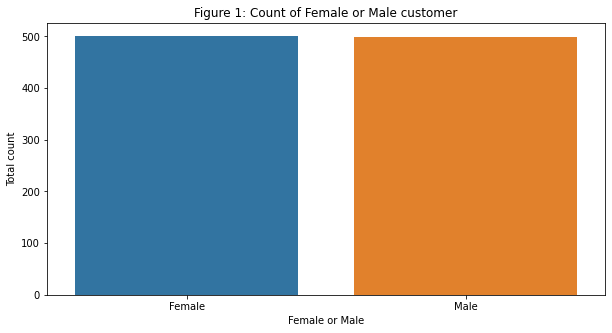

In [86]:
plt.figure(figsize=(10,5))  # assigning figure size
sns.countplot(x = "Gender" , data = sales) #using count plot to visualise the Male Vs Female customer
plt.title("Figure 1: Count of Female or Male customer")
plt.xlabel("Female or Male")
plt.ylabel("Total count")
#Labeling our figue
plt.show()

**Answer -** So clearly the numbers as well as the figure shows Female customer is just above male customer but the difference is very small. So we can say supermarket is equally popular among male and female, with female customer just ahead of male.

### **2. What does the customer rating look like and can you also comment on its distribution?**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


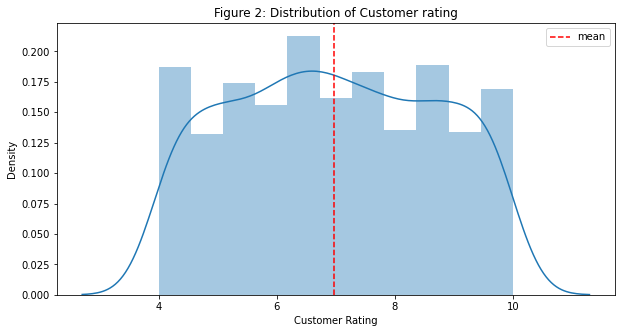

In [87]:
plt.figure(figsize=(10,5))  # assigning figure size
sns.distplot(sales['Rating']) 
# using distribution plot that is both histogram and lineplot to see the distribution
plt.axvline(x=np.mean(sales['Rating']), c='red', ls='--', label='mean')
# using axvline function to assign the mean of the graph
plt.title("Figure 2: Distribution of Customer rating")
plt.xlabel("Customer Rating")
plt.legend()
# labeling the figure

**Answer -** From the above histogram and density plot of rating of cutomer, it is clear that the ratings are evenly distributed and there is no skewness to the left or right.Here i also have plotted the mean of the rating as the red dotted line.The mean rating is approximately 7 across the product.

### **3.What can you say about the aggregate sales across the branches?** 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


A    340
B    332
C    328
Name: Branch, dtype: int64

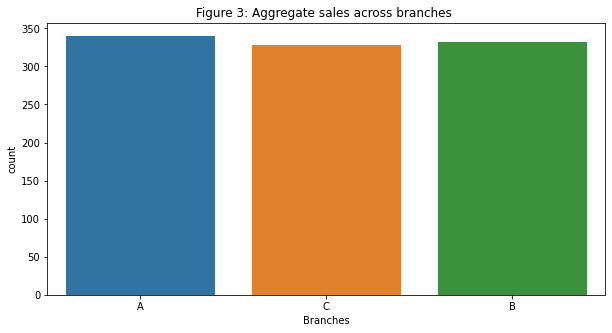

In [88]:
plt.figure(figsize=(10,5))  # assigning figure size
sns.countplot(sales['Branch'])
# Using countplot to draw graph as Branch is categorical data
plt.title("Figure 3: Aggregate sales across branches ")
plt.xlabel("Branches")
sales['Branch'].value_counts() #USing value count to count number of sales of branches

**Answer -** So here we can see the aggregate sales across the branches are approximately same. The sales of branch A is higher than C and B.

### **4. Which is the most popular payment method used by customers?**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64

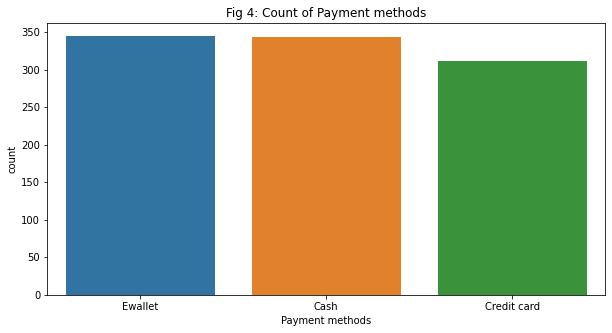

In [89]:
plt.figure(figsize=(10,5))  # assigning figure size
sns.countplot(sales['Payment'])
# countplot to draw graph as paymet is again categorica
plt.title("Fig 4: Count of Payment methods")
plt.xlabel("Payment methods")
sales['Payment'].value_counts() # counting the ways of payment


**Answer -** From the above result or analysis, its clear that most of the customer use Ewallet or Cash payment methoda compared to credit card use.

### **5.Does gross income affect customer ratings?**

Text(0.5, 1.0, 'Fig 5.1:Relation between GrossIncome and Rating')

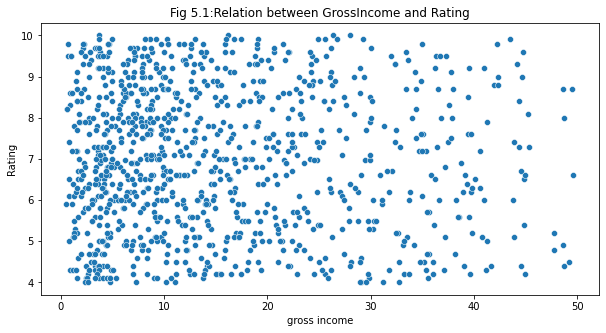

In [90]:
plt.figure(figsize=(10,5))  # assigning figure size
sns.scatterplot(x= "gross income", y= "Rating", data = sales)
# As both gross income and rating is numeric so we are using scatterplot
plt.title("Fig 5.1:Relation between GrossIncome and Rating")

Text(0.5, 1.0, 'Fig 5.2: Trend line')

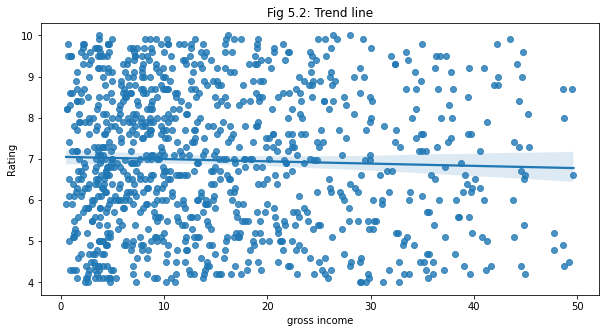

In [91]:
plt.figure(figsize=(10,5))  # assigning figure size
sns.regplot(x= "gross income", y= "Rating", data = sales)
# using regplot to see if there is any trend or not
plt.title("Fig 5.2: Trend line")

**Answer-** From above we can deduct a conclusion that as the trend line very flat, there is no effect of gross income on customer ratings.

### **6.Which is the most profitable branch?**

Text(0.5, 1.0, 'Fig 6: Gross income branch wise ')

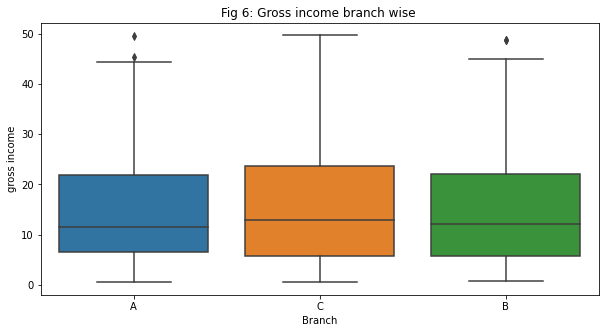

In [92]:
plt.figure(figsize=(10,5))  # assigning figure size
sns.boxplot(x='Branch', y='gross income',data=sales)
# using box plot as Branch is categorical and gross income is numeric and to compare with sales to see profit.
plt.title("Fig 6: Gross income branch wise ")

**Answer -** there is not much difference in gross income on an average level across the branches. however the gross income of branch C is highers than the rest branches.Also branch C has low sales compared to oher two branches. So the profit is more for branch C. That is branch C is more profitable.

### **7.Create a boxplot between Gender and Gross income and explain the results?**

Text(0.5, 1.0, 'Fig 7 : Gross income gender wise')

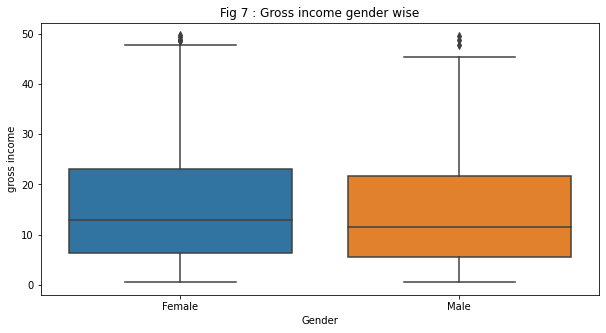

In [93]:
plt.figure(figsize=(10,5))  # assigning figure size
sns.boxplot(x='Gender' , y = 'gross income' , data = sales)
# usingb box plot as gendre is categorical and gross income is numeric
plt.title("Fig 7 : Gross income gender wise")

**Answer -** From the box plot from above it is clear that the mean gross income of male and female are more over same but the 75% gross income from Female customer is bit high compared to Male customer.

### **8.Can you see any time trend in gross income?**

Text(0.5, 1.0, 'Fig 8:Time trend in gross income')

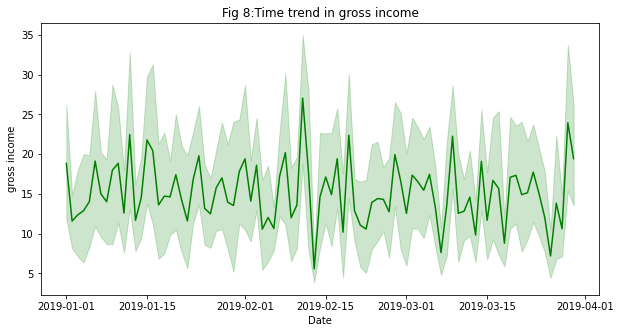

In [94]:
plt.figure(figsize=(10,5))
sns.lineplot(y= "gross income", x= "Date", data = sales, color = 'green')
# using lineplot to see any trend between Date.time with gross income
plt.title("Fig 8:Time trend in gross income")

**Answer -** There is no particular trend of gross income with time. Some days the gross income is very high or low but overall it remains average.

### **9.What is the spending pattern of both males and females, meaning in which category do they spend more?**

Text(0.5, 1.0, 'Fig 9 : Total purchase by gender')

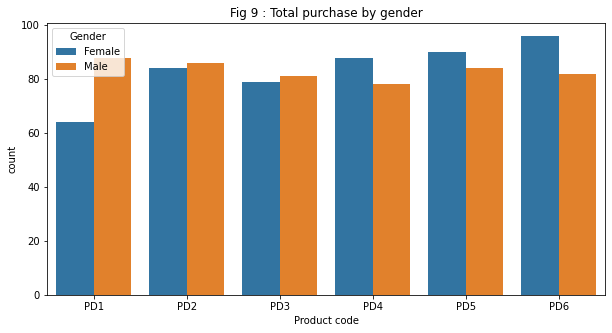

In [95]:
plt.figure(figsize=(10,5))
sns.countplot(x='Product code' , hue = 'Gender' , data = sales)
# we use countplot here because we want to see relation betwwen a categorical datas
plt.title("Fig 9 : Total purchase by gender")

**Answer-** So PD1 purchased by Male customer more while PD2,PD3 are purchased by both male and female moreover equally. PD4 ,PD5 and PD6 is purchased by female by lot compared to male. 

### **10.How many products are bought by customers?**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Fig 10 : Density curve of quantity')

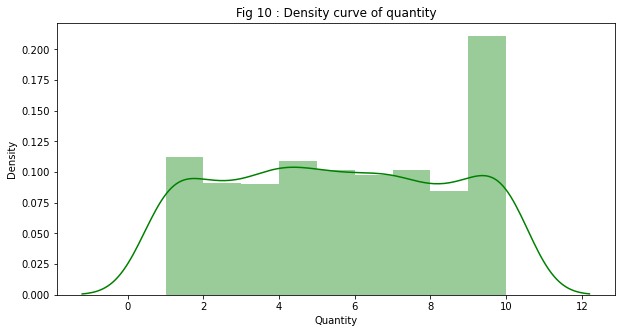

In [96]:
plt.figure(figsize = (10,5))
sns.distplot(sales['Quantity'], color = "green")
#Using histogram and density plot to see the number of product purchased
plt.title("Fig 10 : Density curve of quantity")

**Answer-** The density is very high for purchase of 10 products.So most of the customer pusrchase 10 quantities.

### **11.Which day of the week has maximum sales?**

In [97]:
import datetime # importing date time library
sales['Weekday'] = sales['Date'].dt.day_name()
# creating a new column as "Weekday" using dt.day_name() function

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


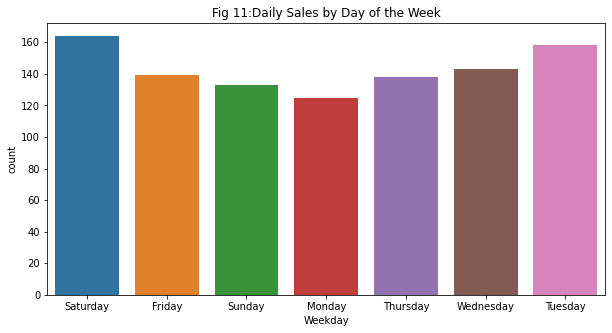

In [98]:
plt.figure(figsize=(10,5))
plt.title('Fig 11:Daily Sales by Day of the Week')
sns.countplot(sales['Weekday'])
# using countplot as weekday is categorical to count sales

**Answer -** This observation is both obvious and surprising.The obvious is the sales is highest on saturday due to weekend. But suprisingly tuesday sales is also close to saturday(May be some offer going on tuesday).Monday has the lowes sales because of may be it's the 1st day of the week. 

### **12.Which hour of the day is busiest?**

Text(0.5, 1.0, 'Fig 12: Amount of sale with hour')

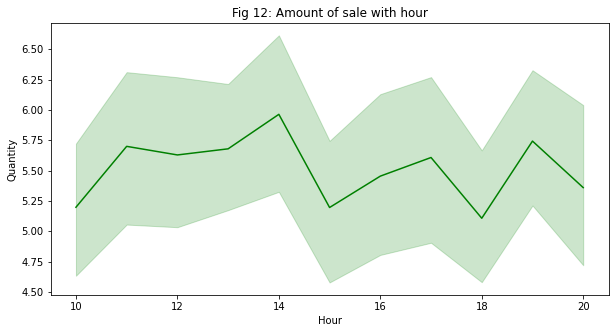

In [99]:
plt.figure(figsize=(10,5))  # assigning figure size
#lets create an hour column first using .dt.hour
sales['Hour'] = sales['Time'].dt.hour
#lets use lineplot to see at which hour the sales is high
sns.lineplot(y = 'Quantity', x= "Hour", color = "green",data = sales)
plt.title("Fig 12: Amount of sale with hour")

**Answer -** As the peak of our plot i around 14th hour so we can say the 2pm is the busiest time of the day.

### **13.Which product line should your supermarket focus on?**

To answer this question we have to take two aspects into acoount, one is a products rating could have been low so we can improve the product quality, second is the quantity of its sale.

Text(0.5, 1.0, 'Fig 13.1: Sale of products ')

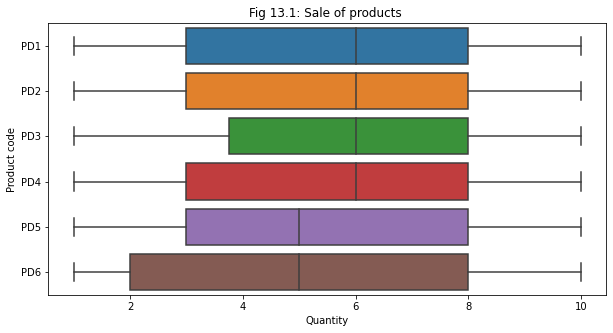

In [100]:
plt.figure(figsize=(10,5))
sns.boxplot( x = 'Quantity' , y = "Product code", data = sales)
#using box plot as there is a numeric and categorical data is involved.so we better use boxplot to see which products quantities sale is low and hisg.
plt.title("Fig 13.1: Sale of products ")

Text(0.5, 1.0, 'Fig 13.2:Ratings of products')

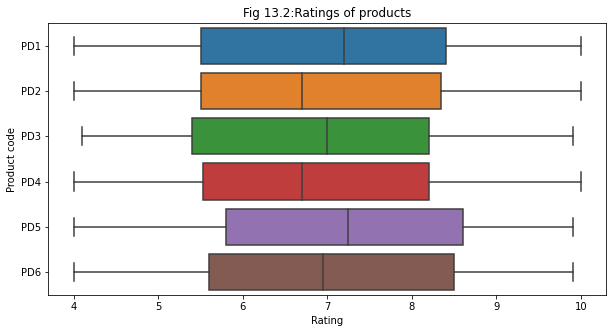

In [101]:
plt.figure(figsize=(10,5))
sns.boxplot(y = 'Product code', x = 'Rating' , data = sales)
# again using boxplot to compare the ratings of different product 
plt.title('Fig 13.2:Ratings of products')

**Answer -** From above Fig 13.1 we can see average sale of PD5 and PD6 is very low however from Fig13.2 its clear that the ratings of both these products very high arond 7. So clearly there is lack of availability of both these products. Thus supply of PD5 and PD6 need to be increased.

### **14.Which city should be chosen for expansion and what products should be focussed on?**

To answer this question we have to look which city has maximum gross income so that we could expand in that city. Then we have to the product's performances, so that we could know which product we should focus more on.

In [103]:
#lets rename the city code column to City
sales.rename(columns={sales.columns[2]: 'City'},inplace=True)

Text(0.5, 1.0, 'Fig 14.a: Sales City wise')

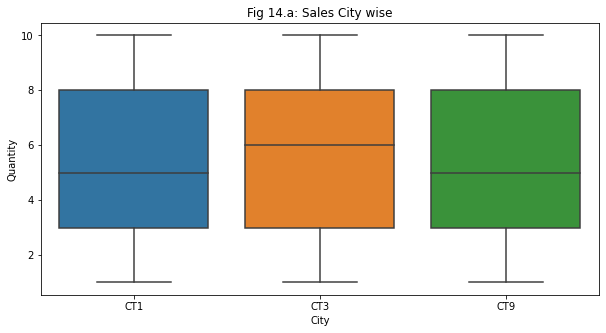

In [104]:
plt.figure(figsize=(10,5))
#lets use boxplot to see which city has more gross income
sns.boxplot(x = "City" , y = "Quantity" , data = sales)
plt.title("Fig 14.a: Sales City wise")

Text(0.5, 1.0, 'Fig 14.b:Count of Products city wise')

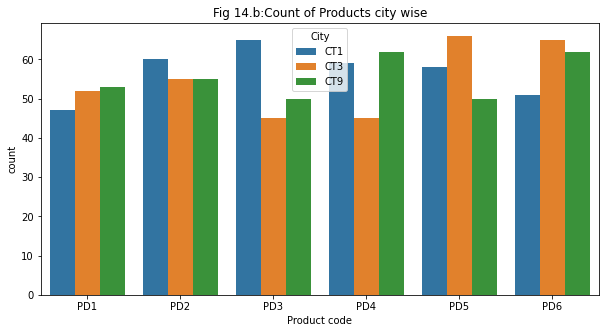

In [105]:
plt.figure(figsize=(10,5))
#lets use countplot to see different products sale in different city
sns.countplot(x='Product code' , hue = 'City' , data=sales)
plt.title("Fig 14.b:Count of Products city wise")

**Answer -** First from Fig14.a we can see the average gross income is more in CT3 so thats the city we should look forward to expand in.


> 
Then from Fig14.b lets focus on CT3 thats orange in color. here we can see PD5 and PD6 are the most sold products so we should focus more on these product for expansion.



### **SUMMARY:**

### So here in this project we used the data available to us. Used some Data analysing and Data visualising techniques to extract infomation.


>
**So our observations:**


>
1. Supermarket is popular among both Male and Female equaly.
>
2. Looks like supermarket is recieving average rating around 7, with that aggregate sales across all the branches is moreover same with Branch A sales bit high.
>
3. There is no relation between gross income and ratings. Branch C is more profitable.
>

4. Both male and female customers spend equaly. But female customer gross income is higher by small margin.
>
5. Supermarket is busy around afternoon.And Tuesday ,saturday sale is higher compared to the rest of the days.
>
6. Super market should focus on expanding in CT3. 







